# Assignment 1
### Last updated: tbd

### Name: your_name

### Uniqname: your_uniqname

## Instructions

Please turn in:
1. A Jupyter Notebook file. This file should show all of the required work, including code, results, visualizations (if any), and necessary comments to your code. Irrelevant code and results should be deleted prior to submission. This file is submitted automatically when you submit your notebook to be autograded. This is done in Assignment 1 -- Create. 

2. An HTML file of the Notebook. Submit this file in Assignment 1 - Submit 

3. A PDF file of the Notebook. Submit this file in Assignment 1 - Submit.

### Before submitting, please select Kernel -> Restart & Run All.

### Please do not remove any code outside of the Not Implemented Error sections. The autograder may need it.

# Assignment 1

In this assignment, we are going to practice analyzing networks using the various measurements and metrics that we have learned this week. You will work with three different network datasets. First, you will choose one of the networks and explore its features. Then you will complete a prediction task using a Facebook network.

## Dataset descriptions

Below are three data sets that you can work with. For this assignment, you only need to choose one, but you are welcome to explore the others. 

### 1. Star wars interaction graph

- `starwars-full-interactions.json`: characters in Star Wars and their interactions. Each character is treated as a node, and an edge is created if two characters ever appear in the same scene.

- `star_war_label.csv`: labels of the most prominent characters.  A character has label 1 if they frequently appear in the Star Wars movies and 0 otherwise. The order of the names and labels in this file is the same as their node number.

> Source: Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479.

### 2. Facebook friendships

- `slavko.net`: an edge list from a friendship network. Each node represents a user on Facebook.

- `slavko_label.txt`: labels of the nodes indicate their level of influence. A label of 1 indicates the node is "influential," and a label of 0 indicates otherwise. The order of the nodes and labels in this file is the same as their node number. The labels of this graph were synthetically generated, but you can think of them as representing the results from a survey, where users were asked to identify Facebook friends who influence their opinions. A node with a label 1 is a user who was identified as influential by at least one of their friends.


> Blagus, N., Šubelj, L. & Bajec, M. (2012). [*Self-similar scaling of density in complex real-world networks*](http://wwwlovre.appspot.com/resources/research/bibs/ssd.bib), Physica A: Statistical Mechanics and its Applications 391(8), 2794-2802, doi:[10.1016/j.physa.2011.12.055](http://dx.doi.org/10.1016/j.physa.2011.12.055), e-print [arXiv:1110.5609](http://arxiv.org/abs/1110.5609), [COBISS:8930132](http://cobiss.izum.si/scripts/cobiss?command=DISPLAY&lani=en&base=COBIB&RID=8930132).


### 3. Students’ Cooperation Social Network

- `multigraph_hashAnonymized.csv`: a cooperation network between students. The nodes are students and an edge between two students indicates that the two students have cooperated in at least one academic activity.</font>

- `multigraph_label.txt`: academic improvement labels. A label of 1 indicates the student has made academic improvement during a period of cooperation and 0 otherwise. 


> Fire, M., Katz, G., Elovici, Y., Shapira, B., and Rokach, L. Fire, Michael, et al. "Predicting student exam’s scores by analyzing social network data." Active Media Technology. Springer Berlin Heidelberg, 2012. 584-595.


In [1]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib.pyplot as plt
#import seaborn as sns

---

## Part 1. Data exploration

For this part, you will choose one of the three datasets described above. We provide the function `get_graph` for you, which extracts a dataset of your choice and creates the corresponding network. 

In [2]:
def get_graph(dataset):
    if dataset == "starwars":
        f=open("assets/starwars-full-interactions.json")
        data = json.load(f)
        char_map = {entry['name']: i for i, entry in enumerate(data['nodes'])}
        edges = [(edge['source'], edge['target']) for edge in data['links']]
        G=nx.Graph()
        G.add_nodes_from([i for i in range(len(char_map))])
        G.add_edges_from(edges)
    elif dataset == "facebook":
        G = nx.read_edgelist("assets/slavko.net", nodetype=int)
    elif dataset == "student":
        G = nx.read_edgelist("assets/student.txt", nodetype=int)
    else:
        raise ValueError("Not a valid dataset")
    return G

### Indicate your choice of data in the cell below, using one of the following strings


- `"starwars"`
- `"facebook"`
- `"student"`

In [3]:
DATASET = "facebook"  # assign the string of your chosen dataset here

# YOUR CODE HERE
G = get_graph(DATASET)
# raise NotImplementedError()

In [4]:
# print("Number of nodes:", G.number_of_nodes())
# print("Number of edges:", G.number_of_edges())

In [5]:
# print("Nodes of graph: ", G.nodes())

In [6]:
# print("Edges of graph: ", G.edges())

In [7]:
# degrees = [G.degree(n) for n in G.nodes()]
# print("Degrees:", degrees)

In [8]:
# nx.draw(G, with_labels=True)
# plt.show()

In [9]:
#hidden tests for Part 1 are within this cell

### Q1. (2 points, Autograded) Plot the histogram of degree distribution.
Use the [`degree_histogram`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html#networkx.classes.function.degree_histogram) function and then plot the histogram using [`plt.bar`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html). 

<font color='red'>**Important**:</font> to receive full points from the autograder, please don't modify additional parameters that adjust the appearance of the figure, such as `width`, `bottom`, etc.

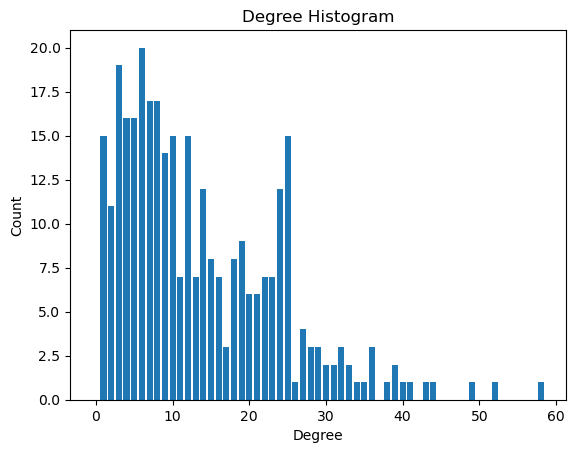

In [10]:
# get graph
G = None    # assign your graph here
img = None  # assign your plt.bar plot to img

# Choose the dataset
DATASET = "facebook"

# Load the dataset
G = get_graph(DATASET)

# Compute degree histogram
degree_hist = nx.degree_histogram(G)

# Create the x-axis values (degrees)
x_values = range(len(degree_hist))

# Plot the histogram
img = plt.bar(x_values, degree_hist)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

In [11]:
#hidden tests for Question 1 are within this cell

### Q2. (3 points, Autograded) Which node has the largest degree centrality and what is the value?

Hint: you can sort a dictionary `D` by its values using 

```python
sorted(D.items(), key=lambda item: item[1])
```

In [12]:
node_max_degree = None  # the node which has the largest degree centrality value. This should be an integer. 
val_deg = None          # the centrality value of the node with the largest degree centrality. This should be a float. 

degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)
node_max_degree, val_deg = sorted_degree_centrality[0]

In [13]:
#hidden tests for Question 2 are within this cell

### Q3. (5 points, Autograded) List the 5 nodes with the largest and smallest closeness centrality.

In [14]:
max_5_cc = []  # a list of 5 nodes with the largest closeness centrality values
min_5_cc = []  # a list of 5 nodes with the smallest closeness centrality values

closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse = True)
max_5_cc = [nd for nd, val in sorted_closeness_centrality[:5]]
min_5_cc = [nd for nd, val in sorted_closeness_centrality[-5:]]

In [15]:
#hidden tests for Question 3 are within this cell

### Q4. (5 points, Autograded) List the 5 nodes with the largest and smallest betweenness centrality. 

In [16]:
max_5_bc = []  # a list of 5 nodes with the largest betweenness centrality values
min_5_bc = []  # a list of 5 nodes with the smallest betweenness centrality values

betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse = True)
max_5_bc = [nd for nd, val in sorted_betweenness_centrality[:5]]
min_5_bc = [nd for nd, val in sorted_betweenness_centrality[-5:]]

In [17]:
#hidden tests for Question 4 are within this cell


### Q5. (5 points, Autograded) What are the 3 nodes with the largest PageRank values in the graph?

Use damping coefficient $\alpha = 0.9$ and create a list of the three nodes with PageRank values in descending order. 

Check whether each pair of nodes among the top 3 nodes with the highest PageRank are connected by an edge. 

Hint: See [`Graph.has_edge`](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.Graph.has_edge.html?highlight=has_edge#networkx.Graph.has_edge)

In [18]:
result = []  # list of the 3 nodes with the largest PageRank values in descending order
has_edge12 = None  # boolean variable indicating whether 1st and 2nd nodes in `result` are connected
has_edge13 = None  # boolean variable indicating whether 1st and 3rd nodes in `result` are connected
has_edge23 = None  # boolean variable indicating whether 2nd and 3rd nodes in `result` are connected

pagerank = nx.pagerank(G, alpha=0.9)
# Sort the PageRank dictionary by values in descending order
sorted_pagerank = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
# Get the 3 nodes with the largest PageRank values
result = [node for node, _ in sorted_pagerank[:3]]
has_edge12 = G.has_edge(result[0], result[1])
has_edge13 = G.has_edge(result[0], result[2])
has_edge23 = G.has_edge(result[1], result[2])

In [19]:
#hidden tests for Question 5 - checking result - are within this cell

In [20]:
#hidden tests for Question 5 - checking edges - are within this cell

### Q6 (a). (5 points, Autograded) List the 5 nodes with the largest hub scores and the 5 nodes with the largest authority scores. 

In [21]:
h5 = []  # a list of the 5 nodes with the largest hub scores
a5 = []  # a list of the 5 nodes with the largest authority scores
hubs, authorities = nx.hits(G)
# Sort the hubs dictionary by values in descending order
sorted_hubs = sorted(hubs.items(), key=lambda item: item[1], reverse=True)

# Sort the authorities dictionary by values in descending order
sorted_authorities = sorted(authorities.items(), key=lambda item: item[1], reverse=True)
# Get the 5 nodes with the largest hub scores
h5 = [node for node, _ in sorted_hubs[:5]]
# Get the 5 nodes with the largest authority scores
a5 = [node for node, _ in sorted_authorities[:5]]

In [22]:
h5

[263, 2, 211, 33, 78]

In [23]:
a5

[263, 2, 211, 33, 78]

In [24]:
#hidden tests for Question 6a are within this cell

### Q6 (b). (2 points, Manually graded) In part 6a, you should have found that nodes with the largest hub score are also the nodes with the largest authority score. In fact, the full ranking of nodes by hub score is the same as the ranking by authority score. This is interesting since we do not typically expect that the best hubs are also the best authorities, according to the HITS algorithm. Explain what features of this particular network make these rankings equal. 

The observation that nodes with the largest hub scores are also the nodes with the largest authority scores in the Facebook network dataset, the network represents friendships among users, meaning that the graph is undirected. Since friendships are mutual, an edge between nodes A and B indicates that A is a friend of B and B is a friend of A. In the context of the HITS algorithm, this means that if node A points to node B (as a good authority), node B also points back to node A (as a good authority).

As a result, nodes that have high authority scores are also likely to have high hub scores.

In [25]:
[n for n,v in sorted_degree_centrality[:5]] # Degree Centrality

[263, 78, 186, 2, 33]

In [26]:
max_5_cc # Closeness centrality

[186, 33, 263, 272, 315]

In [27]:
max_5_bc #Betweenness centrality

[186, 78, 153, 33, 263]

In [28]:
[n for n,v in sorted(pagerank.items(), key=lambda item: item[1], reverse=True)[:5]] #PageRank

[186, 263, 78, 2, 272]

In [29]:
h5 #HITS (Hubs and Authorities)

[263, 2, 211, 33, 78]

### Q7. (5 points, Manually graded) Reflection: 
Did you notice any differences between the nodes with the highest scores across the different centrality measures? Is the amount of overlap between the lists of the top nodes expected? 

In social networks some users may have many connections, acting as hubs or influencers. These highly connected nodes are likely to have high degree centrality, and since they are directly connected to many other nodes, they might also have high closeness centrality. Additionally, these nodes may have a higher probability of being on the shortest paths between other nodes, leading to high betweenness centrality.

### Q8. (3 points, Autograded) What are the average clustering coefficient and graph transitivity of the network?

Transitivity and clustering coefficient are related to the tendency for a network to have triangles. However, they differ in that while clustering coefficient computes clustering on a node-by-node basis first and then averages over the nodes, transitivity computes the fraction of triplets that form a triangle over the entire network. 

In [30]:
graph_trans = None      # graph transitivity. This should be a float. 
avg_clustering = None   # average clustering coefficient value. This should be a float. 

avg_clustering = nx.average_clustering(G)
graph_trans = nx.transitivity(G)

In [31]:
#hidden tests for Question 8 are within this cell


---
## Part 2. Node centrality and connected components

In this part, we are going to remove nodes from a graph and assess the effect that has on the number of connected components in the graph. Generally, removing nodes will tend to **increase** the number of connected components as the graph begins to fragment. However, not all nodes will have the same effect. Removing some highly central nodes is more likely to fragment the graph (and increase the number of connected components) than removing some nodes with low centrality. This is exactly what we want to demonstrate in this part. 

Starting with the entire graph, compute the number of connected components. Then remove 150 total nodes, one at a time. After each node removal, compute the number of connected components. 

We will compare 3 strategies for choosing which 150 nodes to remove: 

1. Remove randomly chosen nodes. 
2. Remove the node with the highest degree centrality in the current graph. 
3. Remove the node with the highest betweenness centrality in the current graph.

The goal is to test what strategy for node removal will fragment the graph faster. 

**<font color='red'>Note: </font>** 

1. We will use the **Facebook** network for this part.
2. Use the `random.choice` function for the random selection, and set the random seed to 0.
3. Do not use `np.random.choice`.


In [32]:
G = get_graph("facebook")

In [33]:
import copy
import random

### 9(a). (10 points, Autograded) Let's begin with the first strategy: removing random nodes from the graph. 

Using the list `rand_move`, append the number of connected components after removing each of the 150 randomly chosen nodes. 

`rand_move` will be initialized with the number of connected components before removing any nodes. You will then append the number of connected components after removing each of the 150 nodes. At the end of the process, `rand_move` will contain 151 integers.

Please use the function `random.choice` 150 times to select each node (instead of using it just once to select all 150 nodes).



In [34]:
random.seed(0)         # use a fixed random seed for autograder
G1 = copy.deepcopy(G)  # operate on a copy of the original graph, because node removal is irreversible
rand_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components 
#Append the number of connected components to this list after removing each of the 150 randomly chosen nodes.

# Remove 150 randomly chosen nodes
for _ in range(150):
    # Choose a random node
    node_to_remove = random.choice(list(G1.nodes()))
    
    # Remove the selected node
    G1.remove_node(node_to_remove)
    
    # Compute the number of connected components after removing the node
    num_components = nx.number_connected_components(G1)
    
    # Append the number of connected components to the list
    rand_move.append(num_components)

In [35]:
#hidden tests for Question 9a are within this cell

###  9(b). (10 points, Autograded) Now let's change the strategy to choosing the nodes with the highest degree centrality. 

Using the list `deg_move`, append the number of connected components after removing each of the 150 nodes. At each step, remove the node with the **currently** highest degree centrality. If multiple nodes have the same centrality values, remove the node which has the **largest node number**. Note that you must recompute the degree centrality of the nodes after removing each node since node removal impacts centrality. 

**Hint**:

To sort by multiply keys, you can use the Python `sorted` function with a specified tuple of keys. 

For example, to sort a sequence of pairs `arr = [(x1, y1), (x2, y2), ...(xn, yn)]` first by `x` then by `y`, the `key` is speficied as the following:

```python
sorted(arr, key=lambda pair: (pair[0], pair[1]))
```

In [36]:
G1 = copy.deepcopy(G)
deg_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components
#As in Q9(a), append the number of connected components to this list after removing each node.

# Remove 150 nodes with the highest degree centrality
for _ in range(150):
    # Compute the degree centrality of the nodes
    degree_centrality = nx.degree_centrality(G1)

    # Sort the nodes by degree centrality, and then by node number in case of ties
    sorted_nodes = sorted(degree_centrality.items(), key=lambda item: (item[1], item[0]), reverse=True)

    # Select the node with the highest degree centrality
    node_to_remove = sorted_nodes[0][0]

    # Remove the selected node
    G1.remove_node(node_to_remove)

    # Compute the number of connected components after removing the node
    num_components = nx.number_connected_components(G1)

    # Append the number of connected components to the list
    deg_move.append(num_components)

In [37]:
#hidden tests for Question 9b are within this cell

###  9(c). (10 points, Autograded) Finally, let's adopt the strategy of choosing the nodes with the highest betweenness centrality. 

Using the list `bet_move`, append the number of connected components after removing each of the 150 nodes. At each step, remove the node with the **currently** highest betweenness centrality. If multiple nodes have the same centrality values, remove the node which has the **largest node number**. Note that you must recompute the betweenness centrality of the nodes after removing each node since node removal impacts centrality. 

In [38]:
G1 = copy.deepcopy(G)
bet_move = [nx.number_connected_components(G1)]  # initialize the list of number of connected components
#As in Q9(a), append the number of connected components to this list after removing each node.

# Remove 150 nodes with the highest betweenness centrality
for _ in range(150):
    # Compute the betweenness centrality of the nodes
    betweenness_centrality = nx.betweenness_centrality(G1)

    # Sort the nodes by betweenness centrality, and then by node number in case of ties
    sorted_nodes = sorted(betweenness_centrality.items(), key=lambda item: (item[1], item[0]), reverse=True)

    # Select the node with the highest betweenness centrality
    node_to_remove = sorted_nodes[0][0]

    # Remove the selected node
    G1.remove_node(node_to_remove)

    # Compute the number of connected components after removing the node
    num_components = nx.number_connected_components(G1)

    # Append the number of connected components to the list
    bet_move.append(num_components)

In [39]:
#hidden tests for Question 9c are within this cell

### 9(d). (2 points, Manually graded) Plot the results.

Now that you have the lists `rand_move`, `deg_move`, and `bet_move`, make a single plot that shows the number of removed nodes on the x-axis and the number of connected components on the y-axis. The plot should include three curves -- one for each node removal strategy. 

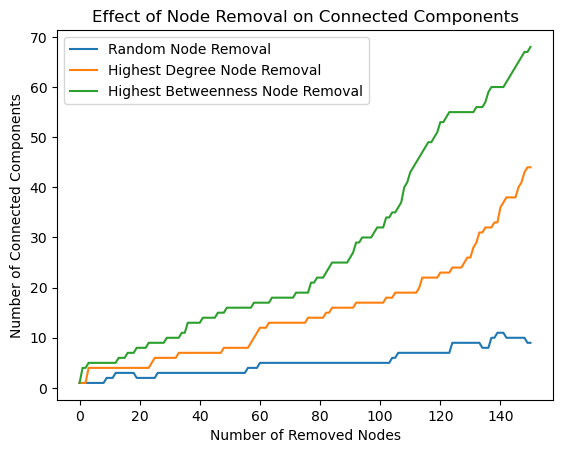

In [40]:
# Create the x-axis values (number of removed nodes)
x_values = range(151)

# Plot the curves for each strategy
plt.plot(x_values, rand_move, label="Random Node Removal")
plt.plot(x_values, deg_move, label="Highest Degree Node Removal")
plt.plot(x_values, bet_move, label="Highest Betweenness Node Removal")

# Set the title, labels, and legend
plt.title("Effect of Node Removal on Connected Components")
plt.ylabel("Number of Connected Components")
plt.xlabel("Number of Removed Nodes")
plt.legend()

# Show the plot
plt.show()

### Q9(e). (15 points, Manually graded) Which node removal strategy made the number of connected components increase the fastest? The slowest? Explain your results. 

Based on the results, the node removal strategy that made the number of connected components increase the fastest is the one that removed nodes with the highest betweenness centrality. The slowest strategy was the one that removed nodes randomly.

The reason for this observation is related to the meaning of the centrality measures.

Betweenness centrality: A node with high betweenness centrality acts as a bridge between different parts of the network. Removing such a node is more likely to disconnect the network because it plays a crucial role in connecting different components. In other words, nodes with high betweenness centrality are important in maintaining the connectivity of the network, so their removal leads to a faster increase in the number of connected components.

Degree centrality: Nodes with high degree centrality are well-connected within the network, but their removal may not necessarily lead to the disconnection of the network, especially if there are alternative paths between their neighbors. Therefore, removing nodes with high degree centrality may result in a slower increase in connected components compared to removing nodes with high betweenness centrality.

Random node removal: In this strategy, nodes are removed without any consideration of their importance or centrality within the network. As a result, it's likely that many removed nodes do not play a crucial role in maintaining the connectivity of the network, leading to a slower increase in the number of connected components compared to the other two strategies.

---

## Part 3. Prediction (18 points, Autograded)

In this part, you are going to complete a supervised prediction task on the **Facebook** network. The task is to predict whether a node is labeled as an "influential" user. You will be given the following two files:

1. `facebook_train.csv`, which contains the training set.
2. `facebook_test.csv`, which contains the test set. 

The training set file provides a label for each node, with `True` indicating the node is "influential" and `False` otherwise. The test set file also has a column `label`，but the values are left as `None` for you to predict. The autograder will use another version of the test set file with the true labels to score your predictions.

Use any node attributes (such as the ones we explored in part 1) as features for this prediction and return the result as a dictionary of `<node, label>`, where `node` is a node that appears in the test set file.


---

**<font color='red'>Note:</font>**
1. Use sklearn [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  as your supervised model, any  hyperparameters, and any node attributes as features.
2. Store your predictions in the dictionary `predict_labels`. 
3. The autograder will measure the F1 score (`sklearn.metrics.f1_score`) of your precitios. In order to pass, your prediction results must achieve an F1 score higher than or equal to 0.85.


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [42]:
predict_labels = dict()  # Your prediction result as a dictionary where 
                        # <key> is a node in the test set and <value> is the predicted label

# Load the training and test set
train_df = pd.read_csv("assets/facebook_train.csv")
test_df = pd.read_csv("assets/facebook_test.csv")

# Extract features for nodes in the training and test sets
def extract_features(df, graph):
    df['degree_centrality'] = df['node'].apply(lambda x: nx.degree_centrality(graph)[x])
#     df['closeness_centrality'] = df['node'].apply(lambda x: nx.closeness_centrality(graph)[x])
#     df['betweenness_centrality'] = df['node'].apply(lambda x: nx.betweenness_centrality(graph)[x])
#     df['pagerank'] = df['node'].apply(lambda x: nx.pagerank(graph, alpha=0.9)[x])
    return df

train_df = extract_features(train_df, G)
test_df = extract_features(test_df, G)

# Prepare training data
X_train = train_df.drop(columns=['node', 'label'])
y_train = train_df['label']

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict labels for the test set
X_test = test_df.drop(columns=['node', 'label'])
y_pred = rf_model.predict(X_test)

# Save predictions in the dictionary
predict_labels = dict(zip(test_df['node'], y_pred))

In [43]:
#hidden tests for Part 3 are within this cell

# End